Intro to RNNs
Recurrent Neural Networks (RNNs) are used to work with sequential data. This includes:
 Time series data
 Language data
 Sound data
 Video data
 And much more
The reason that RNNs are used on sequential data is because they take into account what happened previously. RNNs do this by feeding the output of the previous time step into the
network at the following time step.
Here is what a RNN layer looks like visually:

(image source)

LSTMs and GRUs
One problem with RNNs is that during the fitting process, the networks complete what we call backpropagation through time. This involves a lot of multiplying of gradients (due to the chain
rule), which can lead to the vanishing gradient problem. LSTMs and GRUs are certain types of recurrent layers that overcome this problem.

RNNs in Python
Learning Objectives:
By the end of this module, you should be able to:
 Use Keras to build a RNN to work with time series data

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [7]:
path = r"C:\Users\User\github_projects\Machine_Learning_with_Python\datasets\AAPL.csv"

aapl = pd.read_csv(path, index_col = 'Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769094,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557423,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096231,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001547,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044607,458707200


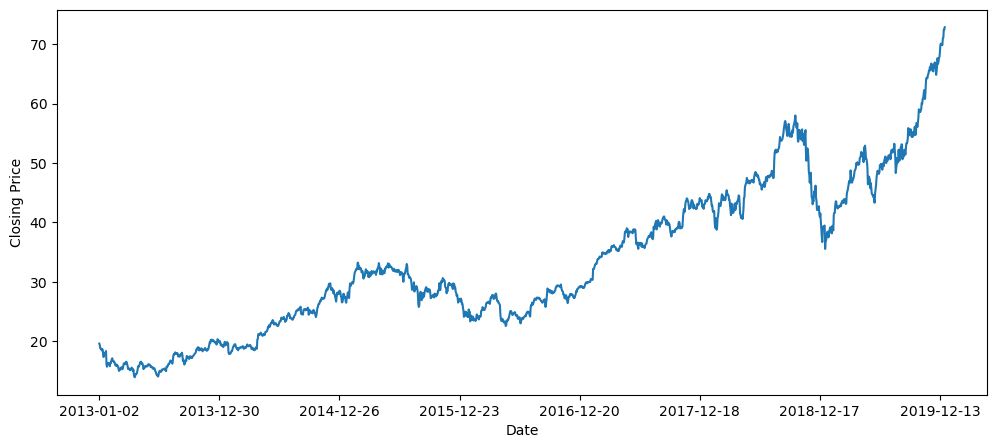

In [8]:
plt.figure(figsize = (12, 5))
aapl['Close'].plot()
plt.ylabel('Closing Price');

In [11]:
# Split data into training and testing - testing is month of January 2020
# We will also only use the closing column
train = aapl.loc['2013-01-02':'2019-12-31', ['Close']]
test = aapl.loc['2020-01-01':'2020-01-31', ['Close']]

In [12]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

Reshape data  
We now need to reshape our data. In RNNs, we use a previous number of time stamps to predict the next values. For this example, we will use the previous 5 days of closing prices to
predict the next day's closing price. To do this, we need to save the previous 5 days worth of stock prices for our feature set.
We also need the data to be 3-dimensional in order to pass it through a RNN layer (we will use an LSTM layer for this example). The first dimension is the number of rows, the second is the
number of time steps (days) we are using to predict the next day's price, and the third is the number of features. For this example, our dimension will be (128, 5, 1), since our training
sequences have 128 values, we are using the past 5 days to predict the next day, and we are only using the closing price.
We are going to be using the TimeseriesGenerator in Keras to get the data in the format we need for a RNN. The following code accomplishes this. Alternatively, you could do this by hand.
You can view an example of this technique here.

In [13]:
# Reshape data into sequences using TimeseriesGenerator
train_features = TimeseriesGenerator(train, train, length = 5)

In [14]:
# Step 1: Define our network structure

# Save the input shape
input_shape = train_features[0][0][0].shape
input_shape

(5, 1)

In [15]:
# Sequential model
model = Sequential()

In [16]:
# LSTM layer
model.add(LSTM(units = 50,

return_sequences = True, # True if next layer will be a recurrent layer
input_shape = input_shape))

model.add(LSTM(units = 50,

return_sequences = True))

model.add(LSTM(units = 50,

return_sequences = False))

# Output layer
model.add(Dense(units = 1, activation = 'linear'))

In [17]:
# Step 2: Compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

Epoch 1/100

14/14 [==============================] - 10s 22ms/step - loss: 0.1081
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0273
Epoch 3/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0285
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0102
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0047
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 8.4032e-04
Epoch 8/100
14/14 [==============================] - 0s 15ms/step - loss: 6.5947e-04
Epoch 9/100
14/14 [==============================] - 0s 23ms/step - loss: 6.3375e-04
Epoch 10/100
14/14 [==============================] - 0s 22ms/step - loss: 6.0795e-04
Epoch 11/100
14/14 [==============================] - 0s 17ms/step - loss: 7.7430e-04
Epoch 12/100
14/14 [==============================] - 0s 17ms/step - loss: 6.5616e-04

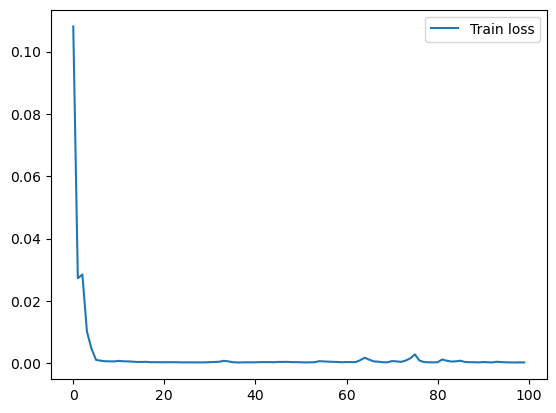

In [18]:
# Step 3: Fit our model
history = model.fit(train_features,
epochs=100)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

Predict stock prices for the month of January 2020  
Let's now predict closing prices for the month of January 2020 using the previous 5 days closing prices. In order to do this, we need to do the same preprocessing to our testing data that we
did with our training data.

In [19]:
test_features = TimeseriesGenerator(test, test, length = 5)

ValueError: `start_index+length=5 > end_index=-1` is disallowed, as no part of the sequence would be left to be used as current step.

In [20]:
preds = model.predict(test_features)

NameError: name 'test_features' is not defined

In [21]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test), label='Actual Price')
# Note: there are less prices for the predicted price than the actual price,
# because we need to use 5 days of prices to create our first prediction
plt.plot(range(5, len(test)), scaler.inverse_transform(preds), label='Predicted Price')
plt.title('Apple Closing Stock Price Prediction')
plt.xlabel('Day (January 2020)')
plt.ylabel('Closing Price')
plt.legend();

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

<Figure size 1200x500 with 0 Axes>